In [1]:
%matplotlib inline
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cPickle

In [2]:
# http://www.msri.org/people/members/eranb/figure_ground.tar.gz
HORSE_PATH='weizmann_horse_db/figure_ground/'
OUT_PATH='weizmann/'
RESOLUTION = 32

In [85]:
# read all the raw images and re-scale to 28*28, save outputs as jpg to OUTPATH
for f in next(os.walk(HORSE_PATH))[2]:
    img = Image.open(HORSE_PATH+f)
    img = img.resize((RESOLUTION, RESOLUTION), Image.ANTIALIAS)
    img.save(OUT_PATH+f)

In [94]:
# read rescaled jpgs as np array
dataset = np.zeros((328,RESOLUTION,RESOLUTION,1))
for i in range(1, 329):
    img = ndimage.imread(OUT_PATH+'horse%03d.jpg'%i)
    img = img.reshape(RESOLUTION,RESOLUTION,1)
    dataset[i-1] = img/255.0
print dataset.shape
print np.mean(dataset)
cPickle.dump(dataset, open( "weizmann.pkl", "wb" ) )


(328, 28, 28, 1)
0.256268544003


In [5]:
# this would center meaningful horse in the middle
OUT_PATH='weizmann_centered/'

for i in range(1, 329):
    img = ndimage.imread(HORSE_PATH+'horse%03d.jpg'%i)
    idxs = np.nonzero(img)
    left, right = np.min(idxs[1]), np.max(idxs[1])
    top, bottom = np.min(idxs[0]), np.max(idxs[0])
    #print left, right, top, bottom

    img = img[top:bottom+1, left:right+1]
    image = Image.fromarray(img)
    image = image.resize((RESOLUTION, RESOLUTION), Image.ANTIALIAS)
    image.save(OUT_PATH+'horse%03d.jpg'%i)
    #image.show()
    

In [63]:
# 209 is weird
i=209
img = ndimage.imread(HORSE_PATH+'horse%03d.jpg'%i)
idxs = np.where(img>254)
left, right = np.min(idxs[1]), np.max(idxs[1])
top, bottom = np.min(idxs[0]), np.max(idxs[0])
print img.shape
#print left, right, top, bottom
img = img[top:bottom+1, left:right+1]
print img.shape
print img

image = Image.fromarray(img)
image = image.resize((RESOLUTION, RESOLUTION), Image.ANTIALIAS)
#image.save(OUT_PATH+'horse%03d.jpg'%i)
#image.show()

(390, 405)
(344, 387)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


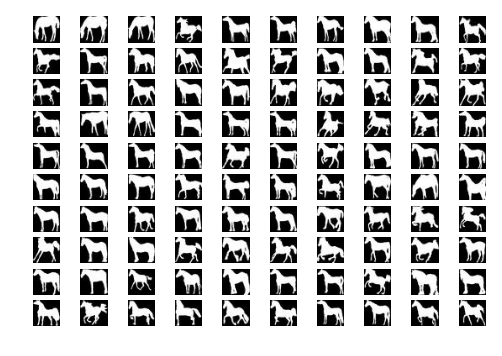

In [12]:
#vis original dataset
def vis_images(images, rows, cols, image_shape, output_name=None):
    assert images.shape[-1] == rows * cols
    f, axarr = plt.subplots(rows, cols)
    for r in range(rows):
        for c in range(cols):
            image_idx = r * cols + c
            image_map = images[:, image_idx].reshape(image_shape)
            axarr[r][c].imshow(image_map, cmap='gray')
            axarr[r][c].set_axis_off()
    f.subplots_adjust(hspace=0.2, wspace=0.2)
    if output_name is None:
        plt.show()
    else:
        plt.savefig(output_name)
        
DATA_PATH = 'weizmann_centered/'
dataset = np.zeros((100,RESOLUTION,RESOLUTION))
for i in range(229, 329):
    img = ndimage.imread(DATA_PATH+'horse%03d.jpg'%i)
    dataset[i-229] = img
dataset = dataset.reshape(100,-1)
vis_images(dataset.T, 10, 10, (RESOLUTION,RESOLUTION), output_name=DATA_PATH+'summary1.png')